In [2]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pickle

In [5]:
pd.__version__

'1.4.2'

In [6]:
df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [8]:
df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)

In [9]:
df['duration']=df.tpep_dropoff_datetime-df.tpep_pickup_datetime
df.duration=df.duration.apply(lambda td:td.total_seconds()/60)

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [11]:
df=df[df.VendorID==2]

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

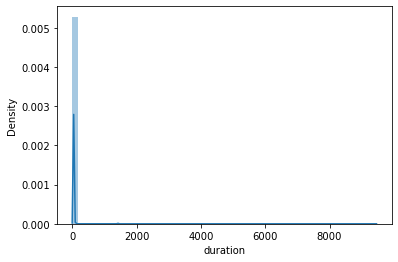

In [12]:
sns.distplot(df.duration)

In [13]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    2.234632e+06
mean     1.562535e+01
std      3.934733e+01
min      0.000000e+00
50%      1.156667e+01
95%      3.706667e+01
98%      4.905000e+01
99%      5.753333e+01
max      9.455400e+03
Name: duration, dtype: float64

In [14]:
((df.duration>=1)&(df.duration<=60)).mean()

0.9793008423758364

In [15]:
df=df[(df.duration>=1)&(df.duration<=60)]

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00,19.800000
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.70,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75,26.050000
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.00,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00,28.183333
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.00,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00,1.133333
10,2,2024-01-01 00:35:22,2024-01-01 00:41:41,2.0,0.75,1.0,N,107,137,1,7.90,1.0,0.5,0.00,0.0,1.0,12.90,2.5,0.00,6.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964616,2,2024-01-31 23:40:02,2024-01-31 23:47:45,NaN,1.89,NaN,None,48,68,0,12.54,0.0,0.5,3.31,0.0,1.0,19.85,NaN,NaN,7.716667
2964617,2,2024-01-31 23:27:00,2024-01-31 23:43:00,NaN,8.99,NaN,None,50,127,0,35.24,0.0,0.5,7.85,0.0,1.0,47.09,NaN,NaN,16.000000
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.0,0.5,2.00,0.0,1.0,21.77,NaN,NaN,8.616667
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.0,0.5,0.00,0.0,1.0,23.97,NaN,NaN,19.000000


In [17]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

In [18]:
df[categorical].dtypes

PULocationID    int32
DOLocationID    int32
dtype: object

In [19]:
df[categorical]=df[categorical].astype(str)

In [20]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.70,2.5,0.00,19.800000
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.0,0.0,1.0,64.95,0.0,1.75,26.050000
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.0,0.0,1.0,36.00,2.5,0.00,28.183333
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.0,0.0,1.0,8.00,2.5,0.00,1.133333
10,2,2024-01-01 00:35:22,2024-01-01 00:41:41,2.0,0.75,1.0,N,107,137,1,7.9,1.0,0.5,0.0,0.0,1.0,12.90,2.5,0.00,6.316667


In [21]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

In [22]:
df[categorical+numerical].iloc[:10]

,PULocationID,DOLocationID,trip_distance
0,186,79,1.72
6,138,181,10.82
8,161,261,5.44
9,113,113,0.04
10,107,137,0.75
18,141,263,1.50
19,161,263,2.57
20,263,236,0.66
22,158,113,0.94
25,148,4,1.08


In [23]:
df[categorical+numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '186', 'DOLocationID': '79', 'trip_distance': 1.72},
 {'PULocationID': '138', 'DOLocationID': '181', 'trip_distance': 10.82},
 {'PULocationID': '161', 'DOLocationID': '261', 'trip_distance': 5.44},
 {'PULocationID': '113', 'DOLocationID': '113', 'trip_distance': 0.04},
 {'PULocationID': '107', 'DOLocationID': '137', 'trip_distance': 0.75},
 {'PULocationID': '141', 'DOLocationID': '263', 'trip_distance': 1.5},
 {'PULocationID': '161', 'DOLocationID': '263', 'trip_distance': 2.57},
 {'PULocationID': '263', 'DOLocationID': '236', 'trip_distance': 0.66},
 {'PULocationID': '158', 'DOLocationID': '113', 'trip_distance': 0.94},
 {'PULocationID': '148', 'DOLocationID': '4', 'trip_distance': 1.08}]

In [24]:
train_dicts=df[categorical+numerical].to_dict(orient='records')

In [25]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [26]:
X_train

<2188377x514 sparse matrix of type '<class 'numpy.float64'>'
	with 6565131 stored elements in Compressed Sparse Row format>

In [27]:
##trip_distance is a numerical value, so dictvectorizer doesn not attempt to do any pre processing. 
##For each location we have a feature (pick up and drop off location)
dv.feature_names_[:10]

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11']

In [28]:
target='duration'
y_train=df[target].values

In [29]:
y_train

array([19.8       , 26.05      , 28.18333333, ...,  8.61666667,
       19.        , 17.85      ])

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


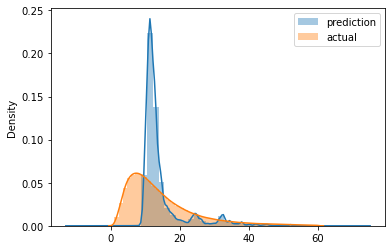

In [32]:
sns.distplot(y_pred,label='prediction')
sns.distplot(y_train,label='actual')

plt.legend()

In [33]:
mean_squared_error(y_train,y_pred,squared=False)

7.806240365059047

## STEP 1

In [4]:
def read_dataframe(filename):
    df=pd.read_parquet(filename)
    
    df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
    df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
                   
    df['duration']=df.tpep_dropoff_datetime-df.tpep_pickup_datetime
    df.duration=df.duration.apply(lambda td:td.total_seconds()/60)
    
    df=df[(df.duration>=1)&(df.duration<=60)]
    
    categorical=['PULocationID','DOLocationID']
    df[categorical]=df[categorical].astype(str)
    
    return df

## STEP 2

In [5]:
df_train=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
df_val=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')
len(df_train),len(df_val)

(2898906, 2938060)

## STEP 3

In [6]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

dv=DictVectorizer()

##to dict predictors(X) to train
train_dicts=df_train[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

##to dict predictors(X) to validate
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

## STEP 4

In [7]:
## target (y) for training
target='duration'
y_train=df_train[target].values

## target (y) for validation
y_val=df_val[target].values

## STEP 5 (Evaluation)

In [8]:
##Baseline Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

mean_squared_error(y_val,y_pred,squared=False)

8.12319291087713

In [11]:
##Lasso
lr=Lasso(alpha=0.05)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

mean_squared_error(y_val,y_pred,squared=False)

8.861838588782334

In [13]:
##Ridge
lr=Ridge(alpha=1)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

mean_squared_error(y_val,y_pred,squared=False)

8.157843117346097

## Key PU-DO Approach

In [14]:
df_train['PU_DO']=df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO']=df_val['PULocationID']+'_'+df_val['DOLocationID']

In [15]:
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration,PU_DO
0,2,2024-02-01 00:04:45,2024-02-01 00:19:58,1.0,4.39,1.0,N,68,236,1,...,1.0,0.5,1.28,0.00,1.0,26.78,2.5,0.00,15.216667,68_236
1,2,2024-02-01 00:56:31,2024-02-01 01:10:53,1.0,7.71,1.0,N,48,243,1,...,1.0,0.5,9.00,0.00,1.0,45.00,2.5,0.00,14.366667,48_243
2,2,2024-02-01 00:07:50,2024-02-01 00:43:12,2.0,28.69,2.0,N,132,261,2,...,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75,35.366667,132_261
3,1,2024-02-01 00:01:49,2024-02-01 00:10:47,1.0,1.10,1.0,N,161,163,1,...,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.00,8.966667,161_163
4,1,2024-02-01 00:37:35,2024-02-01 00:51:15,1.0,2.60,1.0,N,246,79,2,...,3.5,0.5,0.00,0.00,1.0,20.60,2.5,0.00,13.666667,246_79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007521,2,2024-02-29 23:20:17,2024-02-29 23:28:25,NaN,0.35,NaN,None,164,170,0,...,0.0,0.5,0.00,0.00,1.0,25.02,NaN,NaN,8.133333,164_170
3007522,2,2024-02-29 23:38:37,2024-02-29 23:49:37,NaN,1.99,NaN,None,249,45,0,...,0.0,0.5,0.00,0.00,1.0,22.78,NaN,NaN,11.000000,249_45
3007523,2,2024-02-29 23:14:40,2024-02-29 23:19:29,NaN,0.84,NaN,None,113,249,0,...,0.0,0.5,0.00,0.00,1.0,12.82,NaN,NaN,4.816667,113_249
3007524,1,2024-02-29 23:12:06,2024-02-29 23:21:53,NaN,0.00,NaN,None,164,107,0,...,0.0,0.5,0.00,0.00,1.0,18.37,NaN,NaN,9.783333,164_107


In [16]:
categorical=['PU_DO']
numerical=['trip_distance']

dv=DictVectorizer()

##to dict predictors(X) to train
train_dicts=df_train[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dicts)

##to dict predictors(X) to validate
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [17]:
## target (y) for training
target='duration'
y_train=df_train[target].values

## target (y) for validation
y_val=df_val[target].values

In [19]:
##Ridge
lr=Ridge(alpha=0.001)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_val)

mean_squared_error(y_val,y_pred,squared=False)

6.057940188427713

In [22]:
with open ('/workspaces/mlops-zoomcamp/models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv,lr),f_out)